<a href="https://colab.research.google.com/github/belindalafaille/Time-Series-Forecasting-With-Python-Using-Facebook-Prophet-SARIMAX-LSTM.../blob/main/Facebook_Prophet_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Directory, Library, Data

In [2]:
%cd /content/drive/MyDrive/Zero to Mastery Academy/Time Series Forecasting Product

/content/drive/MyDrive/Zero to Mastery Academy/Time Series Forecasting Product


In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.model_selection import ParameterGrid

In [4]:
# Loading the data
df = pd.read_csv('nyc_data.csv')
future_df = pd.read_csv('future.csv')
future_df.head()

,Date,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,1/1/2021,NaN,0,0,0,5.00,154.221
1,1/2/2021,NaN,0,0,0,11.11,264.805
2,1/3/2021,NaN,0,0,0,3.89,115.499
3,1/4/2021,NaN,0,0,0,6.67,124.650
4,1/5/2021,NaN,0,0,0,5.56,77.968


In [5]:
# merge both datasets
df= pd.concat([df, future_df])
df

,Date,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,1/1/2015,720.000885,0,0,0,3.68,41.305
1,1/2/2015,581.276773,0,0,0,4.73,131.574
2,1/3/2015,754.117039,0,0,0,7.23,162.700
3,1/4/2015,622.252774,0,0,0,10.96,160.281
4,1/5/2015,785.373319,0,0,0,6.92,51.077
...,...,...,...,...,...,...,...
26,1/27/2021,NaN,0,0,0,3.33,39.664
27,1/28/2021,NaN,0,0,0,1.67,195.314
28,1/29/2021,NaN,0,0,0,-2.78,235.894
29,1/30/2021,NaN,0,0,0,1.11,152.752


In [7]:
# reset the index
df= df.reset_index(drop= True)
display(df)

,Date,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,1/1/2015,720.000885,0,0,0,3.68,41.305
1,1/2/2015,581.276773,0,0,0,4.73,131.574
2,1/3/2015,754.117039,0,0,0,7.23,162.700
3,1/4/2015,622.252774,0,0,0,10.96,160.281
4,1/5/2015,785.373319,0,0,0,6.92,51.077
...,...,...,...,...,...,...,...
2218,1/27/2021,NaN,0,0,0,3.33,39.664
2219,1/28/2021,NaN,0,0,0,1.67,195.314
2220,1/29/2021,NaN,0,0,0,-2.78,235.894
2221,1/30/2021,NaN,0,0,0,1.11,152.752


# Data Preparation

In [8]:
# Rename variable
df= df.rename(columns= {'Demand': 'y',
                        'Date': 'ds'})
df.head()

,ds,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,1/1/2015,720.000885,0,0,0,3.68,41.305
1,1/2/2015,581.276773,0,0,0,4.73,131.574
2,1/3/2015,754.117039,0,0,0,7.23,162.700
3,1/4/2015,622.252774,0,0,0,10.96,160.281
4,1/5/2015,785.373319,0,0,0,6.92,51.077


In [9]:
# Date variable
df.ds= pd.to_datetime(df.ds,
               format= '%m/%d/%Y')
df.ds

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
2218   2021-01-27
2219   2021-01-28
2220   2021-01-29
2221   2021-01-30
2222   2021-01-31
Name: ds, Length: 2223, dtype: datetime64[ns]

# Model Input Preparation



## Holidays

In [10]:
# Easter Holidays
easter_dates= pd.to_datetime(df[df.Easter == 1].ds)
easter_dates

94     2015-04-05
451    2016-03-27
836    2017-04-16
1186   2018-04-01
1571   2019-04-21
1928   2020-04-12
Name: ds, dtype: datetime64[ns]

In [11]:
easter= pd.DataFrame({'holiday': 'easter',
                      'ds': easter_dates,
                      'lower_window': -5,
                      'upper_window': 2})
easter

,holiday,ds,lower_window,upper_window
94,easter,2015-04-05,-5,2
451,easter,2016-03-27,-5,2
836,easter,2017-04-16,-5,2
1186,easter,2018-04-01,-5,2
1571,easter,2019-04-21,-5,2
1928,easter,2020-04-12,-5,2


In [12]:
# Thanksgiving Holidays
thanksgiving_dates= pd.to_datetime(df[df.Thanksgiving == 1].ds)
thanksgiving_dates

329    2015-11-26
693    2016-11-24
1057   2017-11-23
1421   2018-11-22
1792   2019-11-28
2156   2020-11-26
Name: ds, dtype: datetime64[ns]

In [13]:
thanksgiving= pd.DataFrame({'holiday': 'thanksgiving',
                      'ds': thanksgiving_dates,
                      'lower_window': -3,
                      'upper_window': 6})
thanksgiving

,holiday,ds,lower_window,upper_window
329,thanksgiving,2015-11-26,-3,6
693,thanksgiving,2016-11-24,-3,6
1057,thanksgiving,2017-11-23,-3,6
1421,thanksgiving,2018-11-22,-3,6
1792,thanksgiving,2019-11-28,-3,6
2156,thanksgiving,2020-11-26,-3,6


Christmas is included as a regressor.

## Combining the Holidays

In [14]:
# combine the holidays
holidays= pd.concat([easter, thanksgiving])
holidays

,holiday,ds,lower_window,upper_window
94,easter,2015-04-05,-5,2
451,easter,2016-03-27,-5,2
836,easter,2017-04-16,-5,2
1186,easter,2018-04-01,-5,2
1571,easter,2019-04-21,-5,2
1928,easter,2020-04-12,-5,2
329,thanksgiving,2015-11-26,-3,6
693,thanksgiving,2016-11-24,-3,6
1057,thanksgiving,2017-11-23,-3,6
1421,thanksgiving,2018-11-22,-3,6


Now that we have a dataframe with easter and thanksgiving dates, they can be removed from the main df to avoid double input in our model.

In [15]:
# Remove holidays columns from df
df= df.drop(columns= ['Easter', 'Thanksgiving'])
df.head(1)

,ds,y,Christmas,Temperature,Marketing
0,2015-01-01,720.000885,0,3.68,41.305


# Facebook Prophet Model

In [19]:
# split training and testing set
training = df.iloc[:-31, :]
future_df= df.iloc[-31:, :]

In [20]:
# Fetch the parameters
parameters= pd.read_csv('Practice Sessions/Facebook Prophet/best_params_prophet.csv', index_col= 0)

In [21]:
# Extract the parameters values
changepoint_prior_scale= float(parameters.loc['changepoint_prior_scale'][0])
holidays_prior_scale= float(parameters.loc['holidays_prior_scale'][0])
seasonality_prior_scale= float(parameters.loc['seasonality_prior_scale'][0])
seasonality_mode= parameters.loc['seasonality_mode'][0]

In [22]:
# FB model
m= Prophet(holidays= holidays,
           seasonality_mode= seasonality_mode,
           seasonality_prior_scale= seasonality_prior_scale,
           holidays_prior_scale= holidays_prior_scale,
           changepoint_prior_scale= changepoint_prior_scale
           )

# Add Regressors
m.add_regressor('Christmas')
m.add_regressor('Temperature')
m.add_regressor('Marketing')

# Fitting the model
m.fit(training)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpho3rthyu/t5e126qv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpho3rthyu/cx66uhy7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88748', 'data', 'file=/tmp/tmpho3rthyu/t5e126qv.json', 'init=/tmp/tmpho3rthyu/cx66uhy7.json', 'output', 'file=/tmp/tmpho3rthyu/prophet_model36_daw78/prophet_model-20230615225833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:58:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:58:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Forecasting

In [25]:
future= m.make_future_dataframe(periods= len(future_df),
                        freq= 'D') # W for weekly and M for monthly
future= pd.concat([future, df.iloc[:,2:]], axis= 1)
future

,ds,Christmas,Temperature,Marketing
0,2015-01-01,0,3.68,41.305
1,2015-01-02,0,4.73,131.574
2,2015-01-03,0,7.23,162.700
3,2015-01-04,0,10.96,160.281
4,2015-01-05,0,6.92,51.077
...,...,...,...,...
2218,2021-01-27,0,3.33,39.664
2219,2021-01-28,0,1.67,195.314
2220,2021-01-29,0,-2.78,235.894
2221,2021-01-30,0,1.11,152.752


In [26]:
# Forecasting
forecast= m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,Marketing,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,594.800208,617.505174,762.601800,594.800208,594.800208,0.0,0.0,0.0,-3.500117,...,-4.038698,-4.038698,-4.038698,90.132432,90.132432,90.132432,0.0,0.0,0.0,688.146200
1,2015-01-02,594.916536,542.521427,671.691543,594.916536,594.916536,0.0,0.0,0.0,0.200817,...,-89.432100,-89.432100,-89.432100,88.786338,88.786338,88.786338,0.0,0.0,0.0,604.227732
2,2015-01-03,595.032865,650.746204,789.456781,595.032865,595.032865,0.0,0.0,0.0,1.476951,...,25.268407,25.268407,25.268407,87.604898,87.604898,87.604898,0.0,0.0,0.0,716.767271
3,2015-01-04,595.149193,560.328259,699.627552,595.149193,595.149193,0.0,0.0,0.0,1.377774,...,-55.626601,-55.626601,-55.626601,86.606927,86.606927,86.606927,0.0,0.0,0.0,631.352436
4,2015-01-05,595.265522,686.837566,830.117158,595.265522,595.265522,0.0,0.0,0.0,-3.099475,...,74.315198,74.315198,74.315198,85.805667,85.805667,85.805667,0.0,0.0,0.0,759.965189


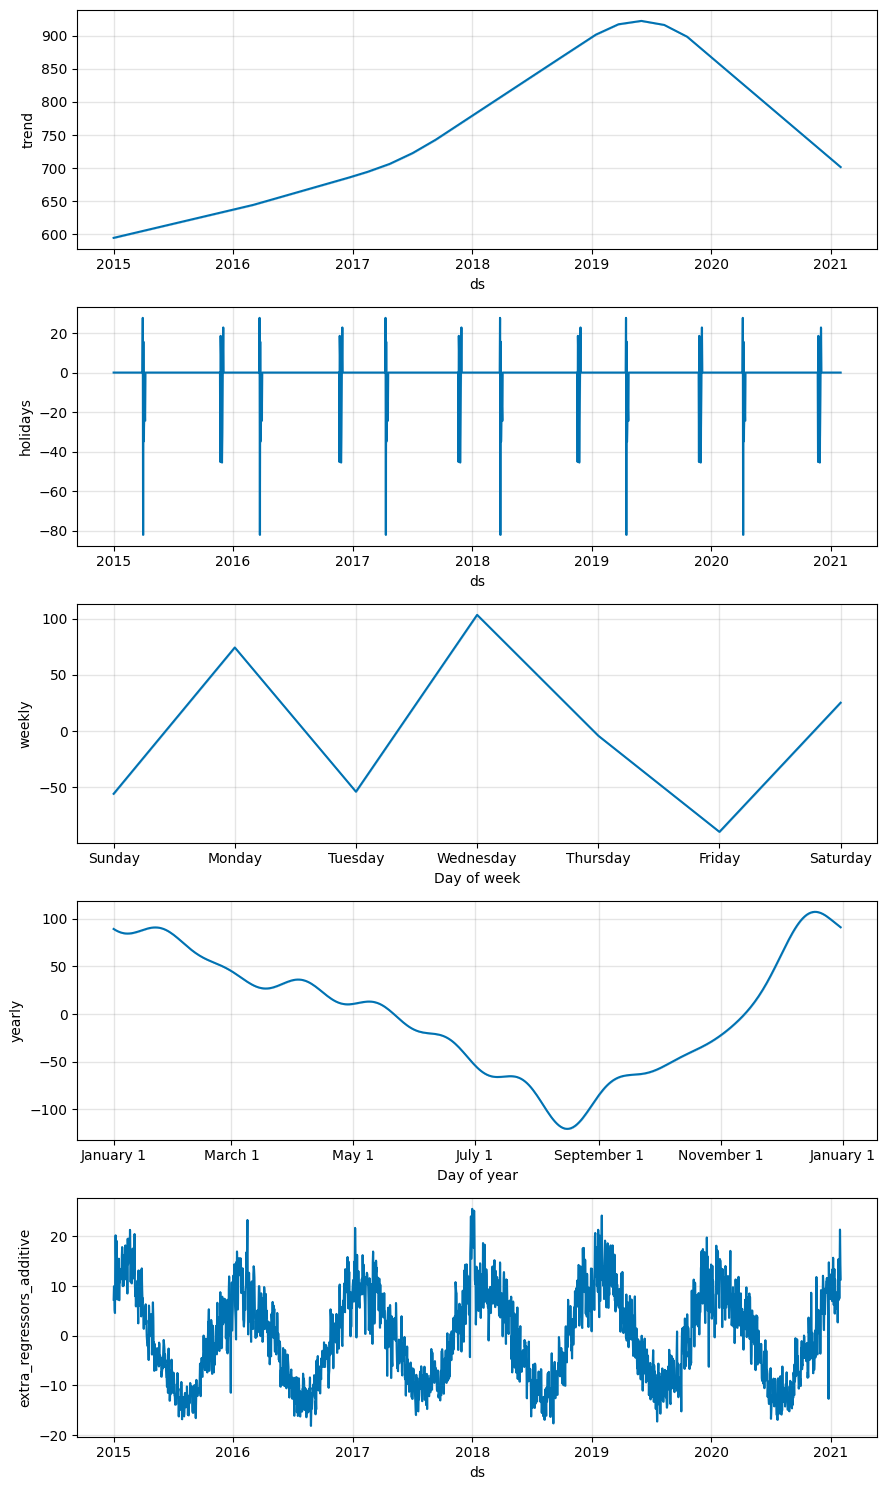

In [28]:
# Plotting
m.plot_components(forecast);

In [31]:
# Extract the Predictions
predictions_prophet= forecast.yhat[-len(future_df):].rename('prophet')
predictions_prophet.index = future_df['ds']
predictions_prophet

ds
2021-01-01    724.978237
2021-01-02    836.729442
2021-01-03    755.052103
2021-01-04    881.410986
2021-01-05    751.342499
2021-01-06    913.894596
2021-01-07    801.559395
2021-01-08    722.272597
2021-01-09    831.483611
2021-01-10    746.085839
2021-01-11    880.722146
2021-01-12    755.267777
2021-01-13    903.573431
2021-01-14    803.404482
2021-01-15    713.315505
2021-01-16    829.525714
2021-01-17    750.016082
2021-01-18    880.097718
2021-01-19    748.990205
2021-01-20    905.809747
2021-01-21    801.432210
2021-01-22    709.841922
2021-01-23    830.825612
2021-01-24    755.085093
2021-01-25    875.901807
2021-01-26    753.434468
2021-01-27    902.787499
2021-01-28    801.927518
2021-01-29    720.758693
2021-01-30    826.544238
2021-01-31    740.780380
Name: prophet, dtype: float64

In [32]:
# Export
predictions_prophet.to_csv('Practice Sessions/Ensemble/predictions_prophet.csv')